In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

1. Вывести информацию о наборе данных.

In [110]:
df = pd.read_csv("Исходные данные.csv", low_memory=False)
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [111]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [112]:
df.shape

(100000, 28)

2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками. Num_of_Loan

In [113]:
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,-100
181,0
182,0
183,0
184,-100
185,-100
186,3
187,3
188,3
189,3


In [114]:
uniq = df["Num_of_Loan"].unique() # Поскольку Num_of_Loan: количество кредитов, взятых в банке оно должно быть >= 0 и не содержать _
uniq

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [115]:
zamena = dict()

for i in uniq:
    if '_' in i and i not in zamena:
        correct = i.replace('_', '')
        zamena[i] = correct
        
zamena

{'0_': '0',
 '3_': '3',
 '2_': '2',
 '5_': '5',
 '8_': '8',
 '9_': '9',
 '4_': '4',
 '7_': '7',
 '1_': '1',
 '6_': '6',
 '597_': '597',
 '92_': '92',
 '1347_': '1347',
 '1185_': '1185',
 '235_': '235',
 '1459_': '1459',
 '1320_': '1320',
 '630_': '630',
 '359_': '359',
 '1225_': '1225',
 '131_': '131',
 '1311_': '1311',
 '1129_': '1129',
 '785_': '785',
 '143_': '143',
 '1131_': '1131',
 '27_': '27',
 '1171_': '1171',
 '227_': '227',
 '378_': '378',
 '1219_': '1219',
 '527_': '527',
 '1027_': '1027',
 '696_': '696',
 '1132_': '1132'}

In [116]:
df = df.replace({"Num_of_Loan" : zamena})
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [117]:
for i in df["Num_of_Loan"]:
    try:
        int(i)
    except:
        print("Ошибка c", i)
else:
    print("Ошибочных данных нет")

Ошибочных данных нет


In [118]:
df.loc[df['Num_of_Loan'] < '0'] = np.nan
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,NaN
181,0
182,0
183,0
184,NaN
185,NaN
186,3
187,3
188,3
189,3


3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [119]:
df["Num_of_Loan"].isna().sum()

3876

In [120]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors='coerce')
df["Num_of_Loan"].isna().sum()

3876

4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [121]:
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months
6,22 Years and 7 Months
7,NaN
8,26 Years and 7 Months
9,26 Years and 8 Months


In [122]:
cha = list(map(lambda x: int(x.split()[0]) * 12 + int(x.split()[3]) if x is not np.NaN else x, df["Credit_History_Age"].tolist()))
cha

[265,
 nan,
 267,
 268,
 269,
 270,
 271,
 nan,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 213,
 214,
 215,
 nan,
 217,
 218,
 219,
 220,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 nan,
 368,
 369,
 nan,
 371,
 372,
 373,
 374,
 nan,
 nan,
 384,
 nan,
 386,
 387,
 nan,
 389,
 390,
 367,
 368,
 369,
 370,
 371,
 nan,
 373,
 374,
 nan,
 176,
 177,
 178,
 179,
 nan,
 181,
 182,
 nan,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 nan,
 318,
 319,
 320,
 321,
 nan,
 nan,
 324,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 nan,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 107,
 108,
 109,
 110,
 111,
 112,
 nan,
 114,
 218,
 219,
 220,
 221,
 222,
 nan,
 224,
 225,
 202,
 203,
 204,
 205,
 206,
 207,
 nan,
 209,
 350,
 351,
 352,
 nan,
 354,
 nan,
 356,
 357,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 218,
 219,
 nan,
 221,
 nan,
 223,
 224,
 225,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,


In [123]:
df["Credit_History_Age"] = cha
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
5,270.0
6,271.0
7,NaN
8,319.0
9,320.0


5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков. Заменить аномальные значения пропусками.

In [124]:
df[["Age"]].head(10)

,Age
0,23
1,23
2,-500
3,23
4,23
5,23
6,23
7,23
8,28_
9,28


In [125]:
ages = df["Age"].unique()
ages

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [126]:
z = dict()

for age in ages:
    if age is not np.nan and '_' in age:
        correct = age.replace('_', '')
        z[age] = correct

z

{'28_': '28',
 '34_': '34',
 '30_': '30',
 '24_': '24',
 '33_': '33',
 '35_': '35',
 '40_': '40',
 '37_': '37',
 '54_': '54',
 '21_': '21',
 '20_': '20',
 '43_': '43',
 '38_': '38',
 '18_': '18',
 '2111_': '2111',
 '46_': '46',
 '16_': '16',
 '19_': '19',
 '47_': '47',
 '53_': '53',
 '25_': '25',
 '27_': '27',
 '55_': '55',
 '42_': '42',
 '48_': '48',
 '49_': '49',
 '50_': '50',
 '32_': '32',
 '22_': '22',
 '17_': '17',
 '29_': '29',
 '15_': '15',
 '51_': '51',
 '31_': '31',
 '26_': '26',
 '39_': '39',
 '14_': '14',
 '36_': '36',
 '44_': '44',
 '7670_': '7670',
 '45_': '45',
 '23_': '23',
 '41_': '41',
 '52_': '52',
 '733_': '733',
 '5769_': '5769',
 '4383_': '4383',
 '56_': '56',
 '2650_': '2650',
 '3307_': '3307',
 '6962_': '6962',
 '5589_': '5589',
 '6556_': '6556',
 '1447_': '1447',
 '8153_': '8153',
 '3834_': '3834',
 '6744_': '6744',
 '6471_': '6471',
 '7723_': '7723',
 '6408_': '6408',
 '3502_': '3502',
 '7316_': '7316',
 '1102_': '1102',
 '8669_': '8669',
 '2463_': '2463',
 '30

In [127]:
df = df.replace({'Age' : z})
df[['Age']]

,Age
0,23
1,23
2,-500
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [128]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [129]:
df[(df['Age'] < 18) | (df['Age'] > 115)].shape

(8174, 28)

В датасете 8174 строк где возраст < 18 (Нельзя оформить кредитную карту) или > 115 (Люди столько не живут (Больше рекорда долголетия))

In [130]:
df.loc[(df['Age'] < 18) | (df['Age'] > 115), 'Age'] = np.nan
df[['Age']].head(10)

,Age
0,23.0
1,23.0
2,NaN
3,23.0
4,23.0
5,23.0
6,23.0
7,23.0
8,28.0
9,28.0


6. Восстановить пропущенные значения признака.
Сравнить распределения признака до и после восстановления.

In [131]:
NoL = df['Num_of_Loan']
NoL_na = df['Num_of_Loan']
NoL = NoL.dropna()
NoL_na = NoL_na.fillna(-1)
df[['Num_of_Loan', 'Type_of_Loan', 'Monthly_Balance']].isna().sum()

Num_of_Loan         3876
Type_of_Loan       14867
Monthly_Balance     5034
dtype: int64

In [132]:
NoL_uniq, NoL_freq = np.unique(NoL, return_counts=True)
NoL_na_uniq, NoL_na_freq = np.unique(NoL_na, return_counts=True)
# Заменим Nan на константу. Мода или медиана не подойдет т.к. мы просто создадим выброс
# Мода точно не подходит т.к. признак не категориальный

list(zip(NoL_uniq, NoL_freq)), list(zip(NoL_na_uniq, NoL_na_freq))

([(0.0, 10930),
  (1.0, 10606),
  (2.0, 15032),
  (3.0, 15104),
  (4.0, 14743),
  (5.0, 7197),
  (6.0, 7803),
  (7.0, 7344),
  (8.0, 3191),
  (9.0, 3702),
  (17.0, 1),
  (18.0, 1),
  (19.0, 1),
  (23.0, 2),
  (27.0, 1),
  (29.0, 1),
  (31.0, 2),
  (32.0, 1),
  (33.0, 2),
  (39.0, 1),
  (41.0, 1),
  (49.0, 2),
  (50.0, 2),
  (52.0, 1),
  (54.0, 1),
  (55.0, 1),
  (56.0, 1),
  (58.0, 2),
  (65.0, 1),
  (70.0, 1),
  (78.0, 1),
  (83.0, 1),
  (84.0, 1),
  (87.0, 1),
  (89.0, 1),
  (92.0, 1),
  (95.0, 2),
  (100.0, 1),
  (101.0, 1),
  (103.0, 1),
  (119.0, 1),
  (123.0, 1),
  (126.0, 1),
  (131.0, 1),
  (132.0, 1),
  (136.0, 1),
  (137.0, 1),
  (138.0, 1),
  (141.0, 2),
  (143.0, 2),
  (146.0, 1),
  (147.0, 1),
  (148.0, 1),
  (153.0, 1),
  (157.0, 1),
  (164.0, 1),
  (172.0, 2),
  (174.0, 1),
  (182.0, 1),
  (186.0, 1),
  (190.0, 1),
  (191.0, 1),
  (192.0, 2),
  (193.0, 1),
  (196.0, 1),
  (198.0, 1),
  (201.0, 1),
  (208.0, 1),
  (215.0, 1),
  (216.0, 1),
  (217.0, 2),
  (227.0, 2),
  (2

In [133]:
NoL_epmf = (NoL_freq / len(NoL)).round(3)
NoL_na_epmf = (NoL_na_freq / len(NoL_na)).round(3)
list(zip(NoL_uniq, NoL_epmf)), list(zip(NoL_na_uniq, NoL_na_epmf))

([(0.0, 0.114),
  (1.0, 0.11),
  (2.0, 0.156),
  (3.0, 0.157),
  (4.0, 0.153),
  (5.0, 0.075),
  (6.0, 0.081),
  (7.0, 0.076),
  (8.0, 0.033),
  (9.0, 0.039),
  (17.0, 0.0),
  (18.0, 0.0),
  (19.0, 0.0),
  (23.0, 0.0),
  (27.0, 0.0),
  (29.0, 0.0),
  (31.0, 0.0),
  (32.0, 0.0),
  (33.0, 0.0),
  (39.0, 0.0),
  (41.0, 0.0),
  (49.0, 0.0),
  (50.0, 0.0),
  (52.0, 0.0),
  (54.0, 0.0),
  (55.0, 0.0),
  (56.0, 0.0),
  (58.0, 0.0),
  (65.0, 0.0),
  (70.0, 0.0),
  (78.0, 0.0),
  (83.0, 0.0),
  (84.0, 0.0),
  (87.0, 0.0),
  (89.0, 0.0),
  (92.0, 0.0),
  (95.0, 0.0),
  (100.0, 0.0),
  (101.0, 0.0),
  (103.0, 0.0),
  (119.0, 0.0),
  (123.0, 0.0),
  (126.0, 0.0),
  (131.0, 0.0),
  (132.0, 0.0),
  (136.0, 0.0),
  (137.0, 0.0),
  (138.0, 0.0),
  (141.0, 0.0),
  (143.0, 0.0),
  (146.0, 0.0),
  (147.0, 0.0),
  (148.0, 0.0),
  (153.0, 0.0),
  (157.0, 0.0),
  (164.0, 0.0),
  (172.0, 0.0),
  (174.0, 0.0),
  (182.0, 0.0),
  (186.0, 0.0),
  (190.0, 0.0),
  (191.0, 0.0),
  (192.0, 0.0),
  (193.0, 0.0),
  (1

In [134]:
NoL_uniq = NoL_uniq[:10]
NoL_freq = NoL_freq[:10]
NoL_epmf = NoL_epmf[:10]
NoL_na_uniq = NoL_na_uniq[:11]
NoL_na_freq = NoL_na_freq[:11]
NoL_na_epmf = NoL_na_epmf[:11]
print(NoL_uniq)
print(NoL_freq)
print(NoL_epmf, NoL_epmf.sum())
print(NoL_na_uniq)
print(NoL_na_freq)
print(NoL_na_epmf, NoL_na_epmf.sum())


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10930 10606 15032 15104 14743  7197  7803  7344  3191  3702]
[0.114 0.11  0.156 0.157 0.153 0.075 0.081 0.076 0.033 0.039] 0.9940000000000001
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 3876 10930 10606 15032 15104 14743  7197  7803  7344  3191  3702]
[0.039 0.109 0.106 0.15  0.151 0.147 0.072 0.078 0.073 0.032 0.037] 0.994


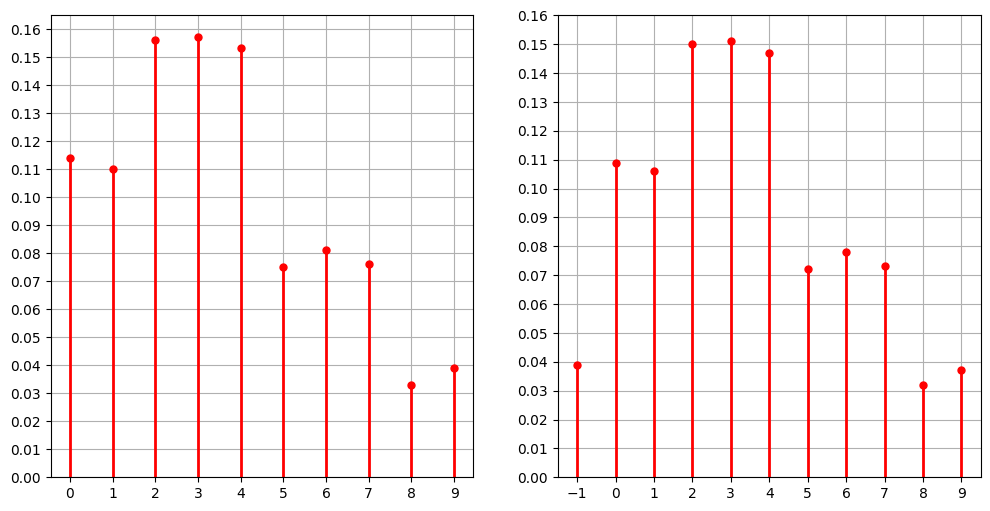

In [135]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(NoL_uniq, NoL_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(NoL_uniq, 0, NoL_epmf, colors='r', lw=2)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 0.17, 0.01))
plt.ylim(0)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(NoL_na_uniq, NoL_na_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(NoL_na_uniq, 0, NoL_na_epmf, colors='r', lw=2)
plt.xticks(np.arange(-1, 10, 1))
plt.yticks(np.arange(0, 0.17, 0.01))
plt.ylim(0)
plt.grid()

In [136]:
df['Monthly_Balance'].isna().sum()

5034

In [137]:
df[['Monthly_Balance']].head(10)

,Monthly_Balance
0,312.49408867943663
1,284.62916249607184
2,331.2098628537912
3,223.45130972736786
4,341.48923103222177
5,340.4792117872438
6,244.5653167062043
7,358.12416760938714
8,470.69062692529184
9,484.5912142650067


In [138]:
zamena = dict()

for i in df['Monthly_Balance']:
    if i is not np.nan and '_' in i:
        zamena[i] = np.nan

zamena

{'__-333333333333333333333333333__': nan}

In [139]:
df = df.replace({'Monthly_Balance' : zamena})

In [140]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = np.round(df['Monthly_Balance'], decimals=0)
df[['Monthly_Balance']].head(5)

,Monthly_Balance
0,312.0
1,285.0
2,331.0
3,223.0
4,341.0


In [141]:
MB = df['Monthly_Balance']
MB_na = df['Monthly_Balance']
MB.isna().sum()

5043

In [142]:
MB = MB.dropna()
mean = (df['Monthly_Balance'].mean()).round(0)
MB_na = MB_na.fillna(mean)
print(mean)
MB_uniq, MB_freq = np.unique(MB, return_counts=True)
MB_na_uniq, MB_na_freq = np.unique(MB_na, return_counts=True)
list(zip(MB_uniq, MB_freq)), list(zip(MB_na_uniq, MB_na_freq))

403.0


([(0.0, 8),
  (1.0, 10),
  (2.0, 13),
  (3.0, 6),
  (4.0, 10),
  (5.0, 10),
  (6.0, 15),
  (7.0, 15),
  (8.0, 12),
  (9.0, 14),
  (10.0, 11),
  (11.0, 16),
  (12.0, 10),
  (13.0, 11),
  (14.0, 17),
  (15.0, 14),
  (16.0, 8),
  (17.0, 8),
  (18.0, 6),
  (19.0, 13),
  (20.0, 11),
  (21.0, 9),
  (22.0, 12),
  (23.0, 12),
  (24.0, 6),
  (25.0, 12),
  (26.0, 11),
  (27.0, 19),
  (28.0, 14),
  (29.0, 18),
  (30.0, 15),
  (31.0, 13),
  (32.0, 13),
  (33.0, 14),
  (34.0, 11),
  (35.0, 11),
  (36.0, 14),
  (37.0, 14),
  (38.0, 18),
  (39.0, 10),
  (40.0, 26),
  (41.0, 16),
  (42.0, 11),
  (43.0, 10),
  (44.0, 17),
  (45.0, 21),
  (46.0, 15),
  (47.0, 10),
  (48.0, 14),
  (49.0, 10),
  (50.0, 19),
  (51.0, 16),
  (52.0, 14),
  (53.0, 16),
  (54.0, 18),
  (55.0, 6),
  (56.0, 16),
  (57.0, 25),
  (58.0, 22),
  (59.0, 17),
  (60.0, 14),
  (61.0, 19),
  (62.0, 20),
  (63.0, 16),
  (64.0, 17),
  (65.0, 16),
  (66.0, 12),
  (67.0, 20),
  (68.0, 19),
  (69.0, 20),
  (70.0, 19),
  (71.0, 21),
  (72.0, 1

In [143]:
MB_epmf = (MB_freq / len(MB)).round(3)
MB_na_epmf = (MB_na_freq / len(MB_na)).round(3)
MB_epmf.tolist(), MB_na_epmf.tolist()

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [144]:
MB_filter = MB_epmf > 0.0
MB_na_filter = MB_epmf > 0.0
MB_uniq = MB_uniq[MB_filter]
MB_epmf = MB_epmf[MB_filter]
MB_na_uniq = MB_na_uniq[MB_na_filter]
MB_na_epmf = MB_na_epmf[MB_na_filter]

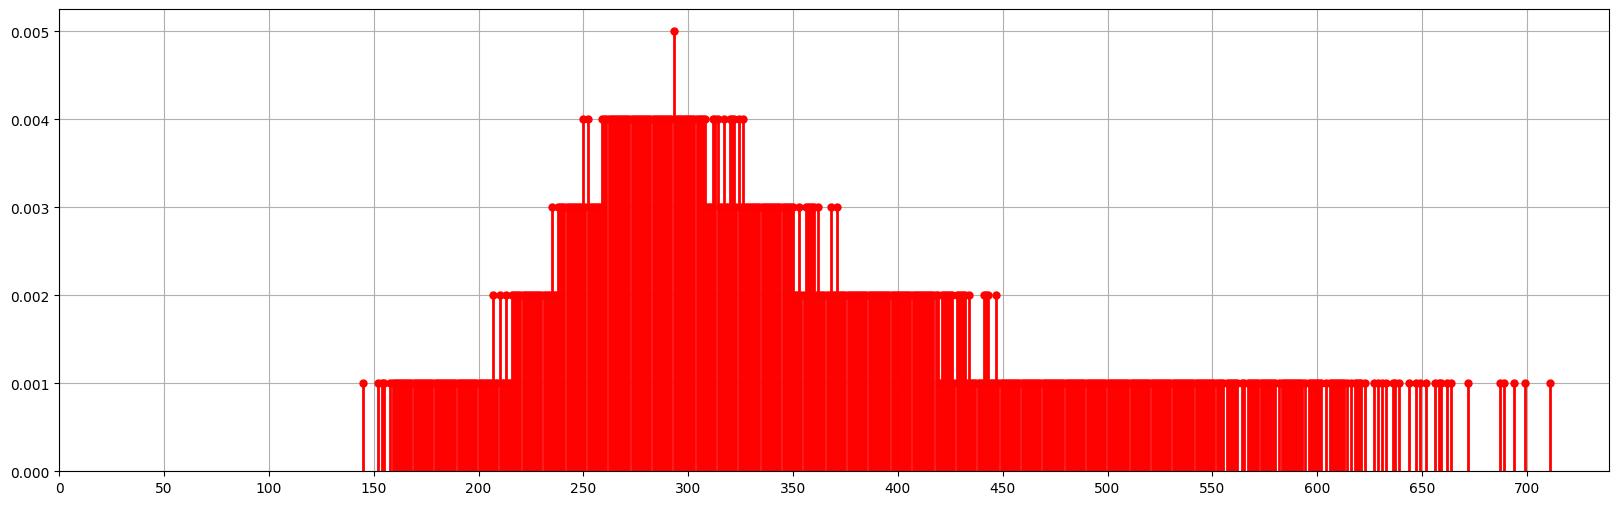

In [145]:
plt.figure(figsize=(20, 6))
plt.plot(MB_uniq, MB_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(MB_uniq, 0, MB_epmf, colors='r', lw=2)
plt.xticks(np.arange(0, 701, 50))
plt.ylim(0)
plt.grid()

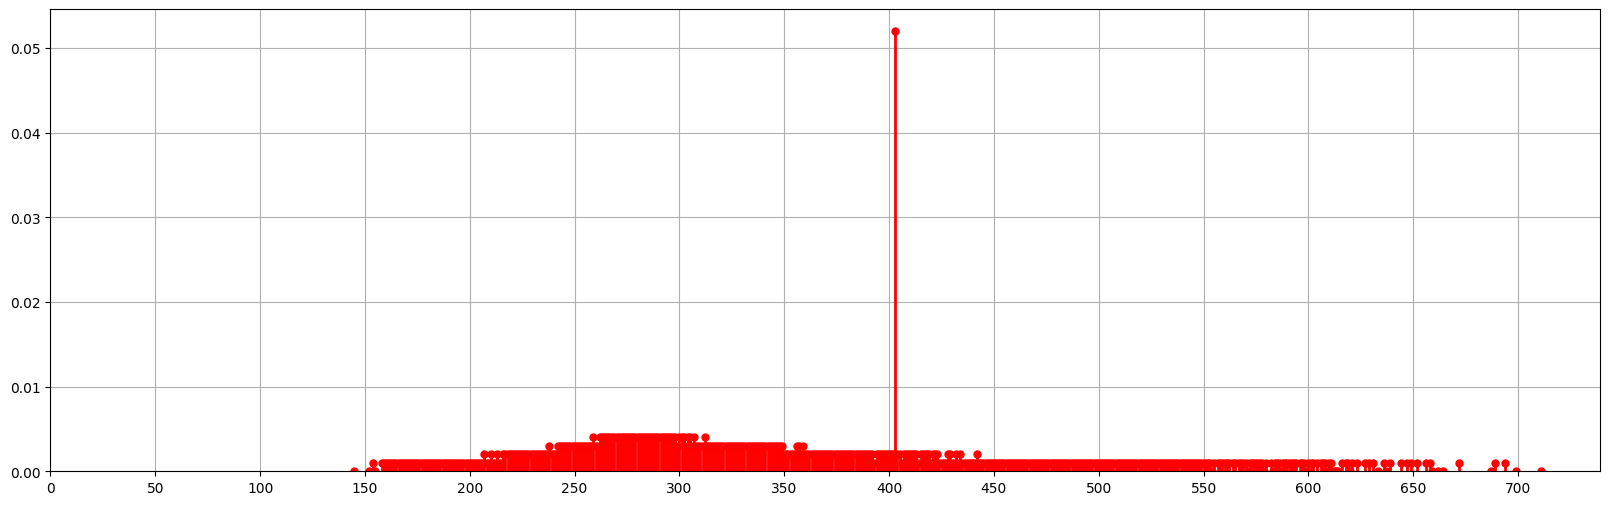

In [146]:
plt.figure(figsize=(20, 6))
plt.plot(MB_na_uniq, MB_na_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(MB_na_uniq, 0, MB_na_epmf, colors='r', lw=2)
plt.xticks(np.arange(0, 701, 50))
plt.ylim(0)
plt.grid()

In [147]:
df[['Type_of_Loan']].head()

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [148]:
df['Type_of_Loan'].unique().tolist()

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Not Specified',
 nan,
 'Credit-Builder Loan, and Mortgage Loan',
 'Not Specified, Auto Loan, and Student Loan',
 'Personal Loan, Debt Consolidation Loan, and Auto Loan',
 'Not Specified, and Payday Loan',
 'Credit-Builder Loan, Personal Loan, and Auto Loan',
 'Payday Loan, and Payday Loan',
 'Not Specified, Student Loan, and Personal Loan',
 'Personal Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, Student Loan, and Payday Loan',
 'Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan',
 'Payday Loan, and Home Equity Loan',
 'Credit-Builder Loan, Not Specified, Mortgage Loan, Payday Loan, Credit-Builder Loan, and Personal Loan',
 'Mortgage Loan, Debt Consolidation Loan, Payday Loan, Auto Loan, and Not Specified',
 'Credit-Builder Loan, Mortgage Loan, Mortgage Loan, Credit-Builder Loan, and Student Loan',
 'No

In [149]:
df['Type_of_Loan_split'] = df['Type_of_Loan'].str.replace(', and ', ', ').str.split(', ')

In [150]:
categories = set()

for lst in df['Type_of_Loan_split']:
    if lst is not np.nan:
        for category in lst:
            categories.add(category)
    else:
        categories.add('NaN')

categories = list(categories)
print(categories)

['Home Equity Loan', 'NaN', 'Payday Loan', 'Debt Consolidation Loan', 'Mortgage Loan', 'Credit-Builder Loan', 'Auto Loan', 'Student Loan', 'Personal Loan', 'Not Specified']


In [151]:
encoded = pd.DataFrame(0, index=df.index, columns=categories)
encoded

,Home Equity Loan,NaN,Payday Loan,Debt Consolidation Loan,Mortgage Loan,Credit-Builder Loan,Auto Loan,Student Loan,Personal Loan,Not Specified
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0


In [152]:
for i, categories in enumerate(df['Type_of_Loan_split']):
    if categories is not np.nan:
        for category in categories:
            encoded.at[i, category] = 1
    else:
        encoded.at[i, 'NaN'] = 1
encoded.head(11)

,Home Equity Loan,NaN,Payday Loan,Debt Consolidation Loan,Mortgage Loan,Credit-Builder Loan,Auto Loan,Student Loan,Personal Loan,Not Specified
0,1,0,0,0,0,1,1,0,1,0
1,1,0,0,0,0,1,1,0,1,0
2,1,0,0,0,0,1,1,0,1,0
3,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,1,1,0,1,0
5,1,0,0,0,0,1,1,0,1,0
6,1,0,0,0,0,1,1,0,1,0
7,1,0,0,0,0,1,1,0,1,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0


In [153]:
ToL_categories = encoded.columns.tolist()
ToL_sums = encoded.sum().tolist()
print(ToL_categories)
print(ToL_sums)

['Home Equity Loan', 'NaN', 'Payday Loan', 'Debt Consolidation Loan', 'Mortgage Loan', 'Credit-Builder Loan', 'Auto Loan', 'Student Loan', 'Personal Loan', 'Not Specified']
[30179, 14867, 30724, 29881, 30156, 30460, 29408, 29791, 29866, 30450]


7. Определить наличие статистических выбросов. Использовать графический и статистический методы. Credit_Utilization_Ratio

In [154]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [155]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

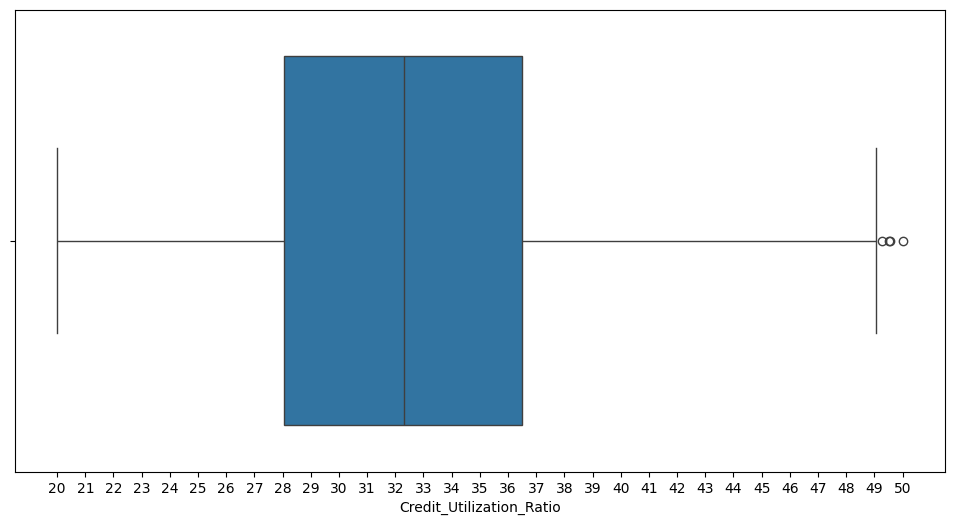

In [156]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Credit_Utilization_Ratio'])
plt.xticks(np.arange(20, 51, 1))
plt.show()

In [157]:
Q1 = df['Credit_Utilization_Ratio'].quantile(0.25)
Q3 = df['Credit_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Credit_Utilization_Ratio'] < lower_bound) | (df['Credit_Utilization_Ratio'] > upper_bound)]
print("Выбросы:")
print(outliers['Credit_Utilization_Ratio'])

Выбросы:
9382     50.000000
17029    49.522324
62954    49.254983
68000    49.564519
Name: Credit_Utilization_Ratio, dtype: float64


8. Закодировать категориальные признаки. Occupation

In [158]:
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,_______
9,Teacher


In [159]:
df['Occupation'].unique().tolist()

['Scientist',
 '_______',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 nan,
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [160]:
df['Occupation'] = df['Occupation'].fillna('tmp')
df['Occupation'] = df['Occupation'].replace(['_______', 'tmp'], np.nan)
df['Occupation'] = df['Occupation'].fillna('No_Info')
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,No_Info
9,Teacher


In [161]:
categories = df['Occupation'].unique().tolist()
categories

['Scientist',
 'No_Info',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [162]:
occ = df[['Occupation']].copy()
occ = occ.astype({'Occupation' : 'category'})
occ.dtypes

Occupation    category
dtype: object

In [163]:
occ['Occupation'].cat.categories

Index(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'No_Info', 'Scientist', 'Teacher',
       'Writer'],
      dtype='object')

In [164]:
occ['Occupation_code'] = occ['Occupation'].cat.codes
occ.head(10)

,Occupation,Occupation_code
0,Scientist,13
1,Scientist,13
2,Scientist,13
3,Scientist,13
4,Scientist,13
5,Scientist,13
6,Scientist,13
7,Scientist,13
8,No_Info,12
9,Teacher,14


9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости. Credit_Utilization_Ratio

In [165]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [166]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

In [167]:
df['Credit_Utilization_Ratio'].isna().sum()

3876

In [168]:
CUR = df['Credit_History_Age'].copy()
CUR = CUR.dropna()
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [169]:
CUR = np.round(CUR, decimals=0)
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [170]:
CUR = CUR.astype(np.int64)
CUR.unique().tolist()

[265,
 267,
 268,
 269,
 270,
 271,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 207,
 208,
 209,
 210,
 211,
 212,
 368,
 369,
 371,
 372,
 373,
 374,
 384,
 386,
 387,
 389,
 390,
 367,
 370,
 176,
 177,
 178,
 179,
 181,
 182,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 318,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 327,
 328,
 329,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 221,
 222,
 224,
 225,
 202,
 203,
 204,
 205,
 206,
 350,
 351,
 352,
 354,
 356,
 357,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 330,
 331,
 332,
 333,
 223,
 237,
 238,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 393,
 394,
 395,
 396,
 400,
 149,
 150,
 151,
 152,
 154,
 147,
 148,
 153,
 164,
 168,
 169,
 170,
 171,
 363,
 364,
 365,
 366,
 105,
 106,
 226,
 227,
 228,
 229,
 104,
 157,
 158,
 159,
 161,
 162,
 163,
 264,
 313,
 314,
 165,
 335,
 336,
 337,
 338,
 339,
 341,
 342,
 94,
 95,
 96,
 97,
 98,
 99,


In [171]:
CUR_uniq, CUR_freq = np.unique(CUR, return_counts=True)
list(zip(CUR_uniq, CUR_freq))

[(1, 2),
 (2, 14),
 (3, 20),
 (4, 35),
 (5, 40),
 (6, 40),
 (7, 50),
 (8, 58),
 (9, 64),
 (10, 77),
 (11, 75),
 (12, 66),
 (13, 68),
 (14, 75),
 (15, 86),
 (16, 90),
 (17, 88),
 (18, 74),
 (19, 77),
 (20, 87),
 (21, 88),
 (22, 87),
 (23, 82),
 (24, 68),
 (25, 81),
 (26, 93),
 (27, 89),
 (28, 80),
 (29, 80),
 (30, 69),
 (31, 67),
 (32, 78),
 (33, 65),
 (34, 64),
 (35, 71),
 (36, 62),
 (37, 62),
 (38, 72),
 (39, 69),
 (40, 74),
 (41, 70),
 (42, 66),
 (43, 60),
 (44, 63),
 (45, 55),
 (46, 63),
 (47, 59),
 (48, 49),
 (49, 58),
 (50, 57),
 (51, 63),
 (52, 60),
 (53, 72),
 (54, 58),
 (55, 59),
 (56, 66),
 (57, 57),
 (58, 62),
 (59, 73),
 (60, 67),
 (61, 77),
 (62, 101),
 (63, 119),
 (64, 135),
 (65, 172),
 (66, 167),
 (67, 174),
 (68, 209),
 (69, 233),
 (70, 245),
 (71, 255),
 (72, 218),
 (73, 219),
 (74, 265),
 (75, 259),
 (76, 257),
 (77, 274),
 (78, 231),
 (79, 235),
 (80, 258),
 (81, 243),
 (82, 244),
 (83, 216),
 (84, 191),
 (85, 171),
 (86, 207),
 (87, 195),
 (88, 201),
 (89, 208),
 (9

In [172]:
CUR_epmf = (CUR_freq / len(CUR)).round(3)
list(zip(CUR_uniq, CUR_epmf))

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.001),
 (8, 0.001),
 (9, 0.001),
 (10, 0.001),
 (11, 0.001),
 (12, 0.001),
 (13, 0.001),
 (14, 0.001),
 (15, 0.001),
 (16, 0.001),
 (17, 0.001),
 (18, 0.001),
 (19, 0.001),
 (20, 0.001),
 (21, 0.001),
 (22, 0.001),
 (23, 0.001),
 (24, 0.001),
 (25, 0.001),
 (26, 0.001),
 (27, 0.001),
 (28, 0.001),
 (29, 0.001),
 (30, 0.001),
 (31, 0.001),
 (32, 0.001),
 (33, 0.001),
 (34, 0.001),
 (35, 0.001),
 (36, 0.001),
 (37, 0.001),
 (38, 0.001),
 (39, 0.001),
 (40, 0.001),
 (41, 0.001),
 (42, 0.001),
 (43, 0.001),
 (44, 0.001),
 (45, 0.001),
 (46, 0.001),
 (47, 0.001),
 (48, 0.001),
 (49, 0.001),
 (50, 0.001),
 (51, 0.001),
 (52, 0.001),
 (53, 0.001),
 (54, 0.001),
 (55, 0.001),
 (56, 0.001),
 (57, 0.001),
 (58, 0.001),
 (59, 0.001),
 (60, 0.001),
 (61, 0.001),
 (62, 0.001),
 (63, 0.001),
 (64, 0.002),
 (65, 0.002),
 (66, 0.002),
 (67, 0.002),
 (68, 0.002),
 (69, 0.003),
 (70, 0.003),
 (71, 0.003),
 (72, 0.002),
 (73, 0.003),

In [173]:
CUR_t = sts.randint.rvs(1, 405, size=len(CUR))
CUR_t.tolist()

[234,
 226,
 146,
 120,
 332,
 313,
 209,
 355,
 63,
 171,
 387,
 167,
 94,
 93,
 119,
 63,
 263,
 199,
 221,
 365,
 102,
 3,
 62,
 158,
 281,
 336,
 227,
 160,
 108,
 365,
 165,
 235,
 144,
 250,
 29,
 392,
 210,
 277,
 401,
 123,
 28,
 233,
 26,
 258,
 174,
 396,
 247,
 136,
 357,
 388,
 365,
 194,
 173,
 199,
 135,
 119,
 378,
 202,
 324,
 132,
 230,
 350,
 135,
 270,
 15,
 13,
 370,
 370,
 110,
 3,
 286,
 280,
 23,
 264,
 227,
 172,
 228,
 236,
 6,
 357,
 306,
 290,
 96,
 353,
 348,
 302,
 273,
 344,
 20,
 308,
 239,
 110,
 314,
 71,
 96,
 17,
 12,
 252,
 222,
 104,
 350,
 172,
 27,
 26,
 39,
 228,
 341,
 231,
 258,
 349,
 325,
 137,
 223,
 376,
 190,
 28,
 323,
 62,
 189,
 213,
 94,
 359,
 379,
 239,
 360,
 26,
 313,
 116,
 216,
 270,
 208,
 359,
 228,
 298,
 201,
 247,
 310,
 55,
 87,
 157,
 303,
 33,
 109,
 22,
 100,
 396,
 155,
 85,
 69,
 319,
 350,
 291,
 209,
 71,
 90,
 233,
 227,
 23,
 364,
 228,
 125,
 53,
 298,
 261,
 380,
 296,
 388,
 4,
 156,
 83,
 189,
 33,
 158,
 114,


In [174]:
CUR_t_empf = sts.randint.pmf(CUR_t, 1, 405)
CUR_t_empf

array([0.00247525, 0.00247525, 0.00247525, ..., 0.00247525, 0.00247525,
       0.00247525])

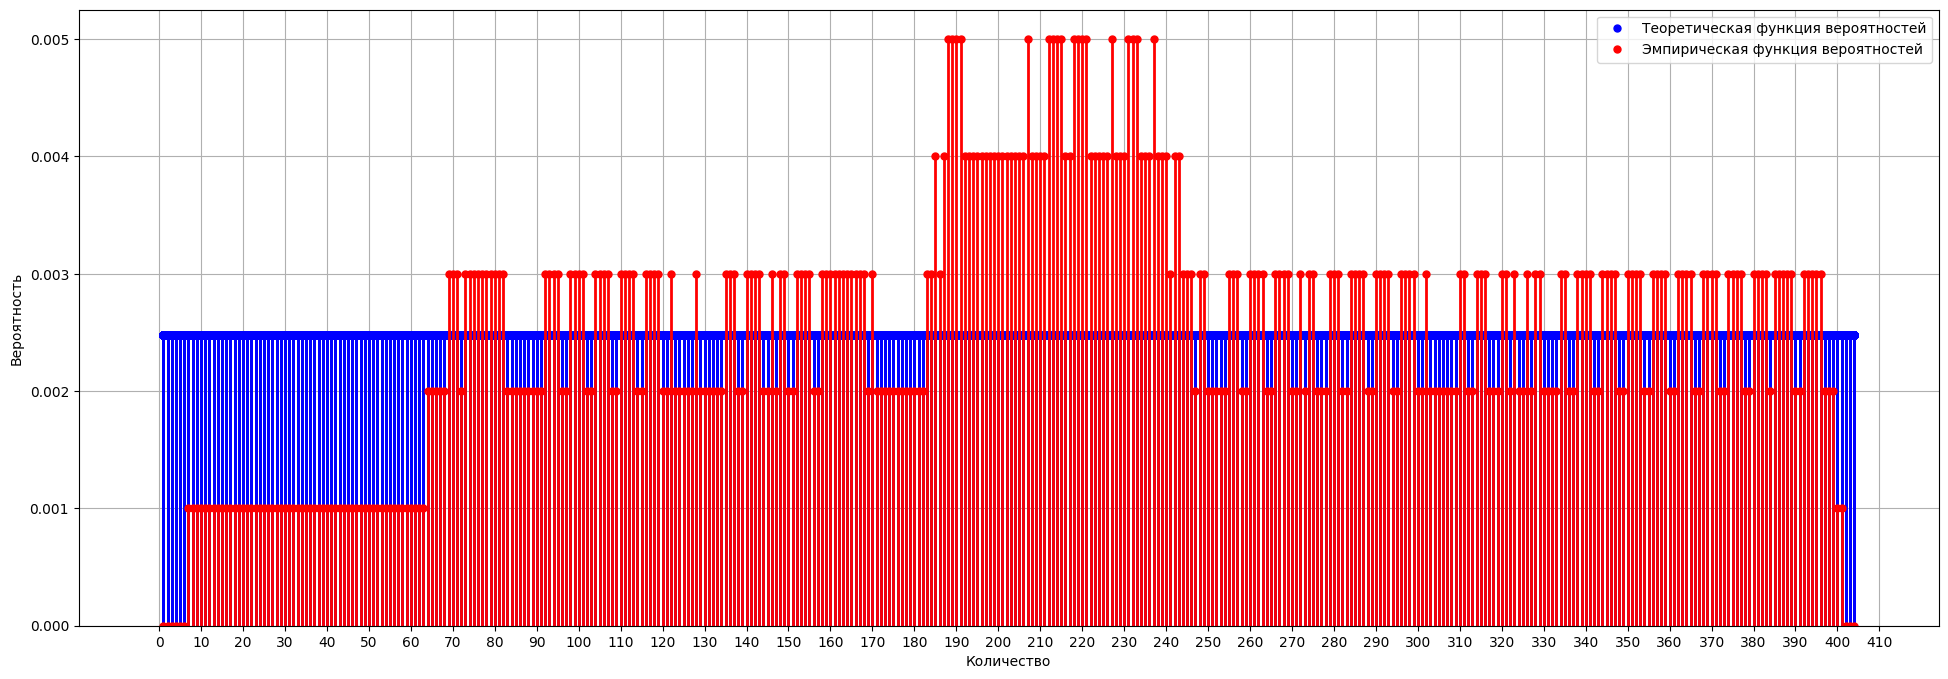

In [175]:
plt.figure(figsize=(24, 8))
plt.plot(CUR_t, CUR_t_empf, 'bo', ms=5, label='Теоретическая функция вероятностей')
plt.vlines(CUR_t, 0, sts.randint.pmf(CUR, 1, 405), colors='b', lw=2)

plt.plot(CUR_uniq, CUR_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(CUR_uniq, 0, CUR_epmf, colors='r', lw=2)

plt.xticks(np.arange(0, 411, 10))
plt.legend()
plt.ylabel('Вероятность')
plt.xlabel('Количество')
plt.ylim(0)
plt.grid()
plt.show()

10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.
Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.

Interest_Rate: процентная ставка по кредитной карте
Credit_Utilization_Ratio: коэффициент использования кредитной карты

In [253]:
tmp = df[['Monthly_Inhand_Salary', 'Monthly_Balance']].copy()
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,NaN,285.0
2,NaN,331.0
3,NaN,223.0
4,1824.843333,341.0
5,NaN,340.0
6,1824.843333,245.0
7,1824.843333,358.0
8,3037.986667,471.0
9,3037.986667,485.0


In [254]:
tmp.isna().sum()

Monthly_Inhand_Salary    18297
Monthly_Balance           5043
dtype: int64

In [255]:
tmp = tmp.dropna().reset_index(drop=True)
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,1824.843333,341.0
2,1824.843333,245.0
3,1824.843333,358.0
4,3037.986667,471.0
5,3037.986667,485.0
6,3037.986667,466.0
7,3037.986667,445.0
8,3037.986667,482.0
9,3037.986667,356.0


In [256]:
tmp.corr()

,Monthly_Inhand_Salary,Monthly_Balance
Monthly_Inhand_Salary,1.000000,0.703844
Monthly_Balance,0.703844,1.000000


In [257]:
type(tmp['Monthly_Balance'][0])

numpy.float64

In [264]:
tmp['Monthly_Inhand_Salary'] = np.round(tmp['Monthly_Inhand_Salary'], decimals=0)

In [265]:
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1825.0,312.0
1,1825.0,341.0
2,1825.0,245.0
3,1825.0,358.0
4,3038.0,471.0
5,3038.0,485.0
6,3038.0,466.0
7,3038.0,445.0
8,3038.0,482.0
9,3038.0,356.0


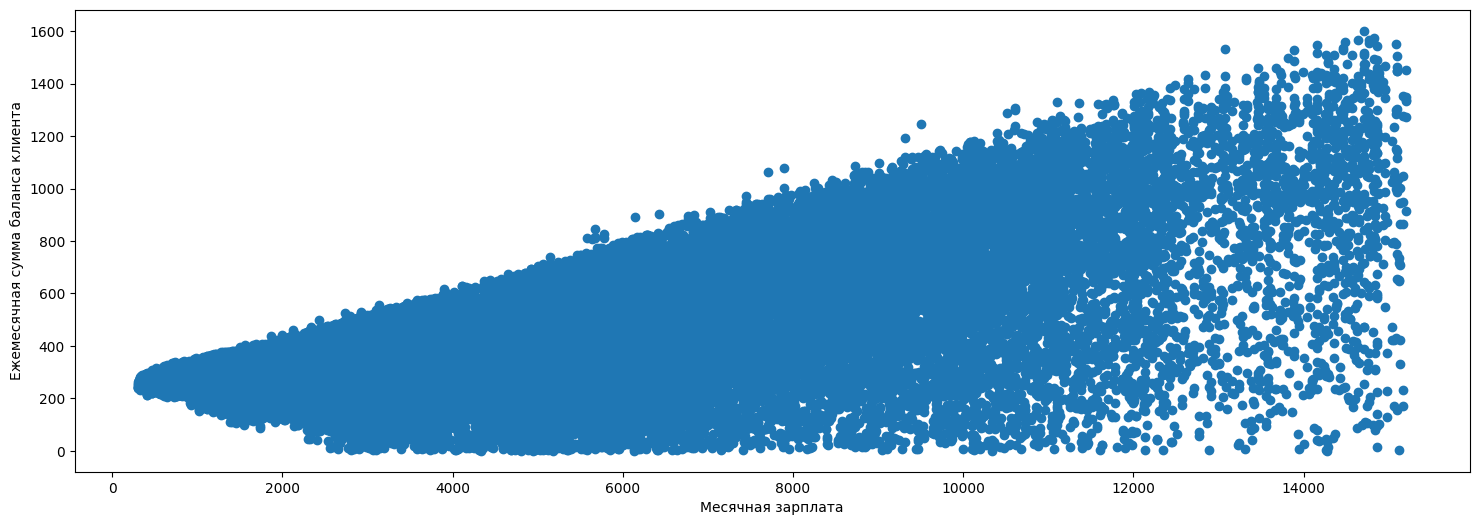

In [269]:
plt.figure(figsize=(18, 6))
plt.scatter(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance'])
plt.xlabel('Месячная зарплата')
plt.ylabel('Ежемесячная сумма баланса клиента')
plt.show()

In [270]:
def pearson_corr(x, y):
    return np.corrcoef(x, y)[0, 1]

def spearman_corr(x, y):
    return sts.spearmanr(x, y)[0]

def kendall_corr(x, y):
    return sts.kendalltau(x, y)[0]

In [273]:
print('Pearson:', pearson_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))
print('Spearman:', spearman_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))
print('Kendall:', kendall_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))

Pearson: 0.7038435015631945
Spearman: 0.5980393319866205
Kendall: 0.45116275198637334


11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости.
Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод.
Написать функцию для расчета корреляционного отношения.
Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.

In [274]:
tmp = df[['Occupation', 'Credit_Utilization_Ratio']].copy()
tmp.head(10)

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347
5,Scientist,27.262259
6,Scientist,22.537593
7,Scientist,23.933795
8,No_Info,24.464031
9,Teacher,38.550848


In [275]:
tmp.isna().sum()

Occupation                     0
Credit_Utilization_Ratio    3876
dtype: int64

In [277]:
tmp = tmp.dropna().reset_index(drop=True)
tmp.head()

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347


In [291]:
tmp = tmp.astype({'Occupation' : 'category', 'Credit_Utilization_Ratio' : np.float64})
tmp

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347
...,...,...
96119,Mechanic,34.663572
96120,Mechanic,40.565631
96121,Mechanic,41.255522
96122,Mechanic,33.638208


In [310]:
tmp['Credit_Utilization_Ratio']= np.round(tmp['Credit_Utilization_Ratio'], decimals=0)
tmp.tail(10)

,Occupation,Credit_Utilization_Ratio
96114,Architect,25.0
96115,Architect,37.0
96116,Mechanic,33.0
96117,Mechanic,29.0
96118,Mechanic,39.0
96119,Mechanic,35.0
96120,Mechanic,41.0
96121,Mechanic,41.0
96122,Mechanic,34.0
96123,Mechanic,34.0


In [309]:
codes = tmp['Occupation'].cat.codes
codes

0        13
1        13
2        13
3        13
4        13
         ..
96119     9
96120     9
96121     9
96122     9
96123     9
Length: 96124, dtype: int8

In [328]:
tmp['Occupation_code'] = codes
tmp.head(15)

,Occupation,Credit_Utilization_Ratio,Occupation_code
0,Scientist,27.0,13
1,Scientist,32.0,13
2,Scientist,29.0,13
3,Scientist,31.0,13
4,Scientist,25.0,13
5,Scientist,27.0,13
6,Scientist,23.0,13
7,Scientist,24.0,13
8,No_Info,24.0,12
9,Teacher,39.0,14


In [312]:
codes_occ = dict()
for i in zip(codes.unique(), tmp['Occupation'].unique()):
    codes_occ[i[1]] = i[0]

codes_occ

{'Scientist': 13,
 'No_Info': 12,
 'Teacher': 14,
 'Engineer': 4,
 'Entrepreneur': 5,
 'Developer': 2,
 'Lawyer': 7,
 'Media_Manager': 10,
 'Doctor': 3,
 'Journalist': 6,
 'Manager': 8,
 'Accountant': 0,
 'Musician': 11,
 'Mechanic': 9,
 'Writer': 15,
 'Architect': 1}

In [299]:
credit = tmp['Credit_Utilization_Ratio']
credit

0        27.0
1        32.0
2        29.0
3        31.0
4        25.0
         ... 
96119    35.0
96120    41.0
96121    41.0
96122    34.0
96123    34.0
Name: Credit_Utilization_Ratio, Length: 96124, dtype: float64

In [316]:
codes_uniq, codes_freq = np.unique(codes, return_counts=True)
codes_epmf = (codes_freq / len(codes)).round(3)
print(codes_uniq)
print(codes_freq)
print(codes_epmf)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[6036 6097 5981 5842 6080 5940 5859 6318 5743 6065 5946 5694 6777 6069
 5993 5684]
[0.063 0.063 0.062 0.061 0.063 0.062 0.061 0.066 0.06  0.063 0.062 0.059
 0.071 0.063 0.062 0.059]


(0.0, 0.07454999999999999)

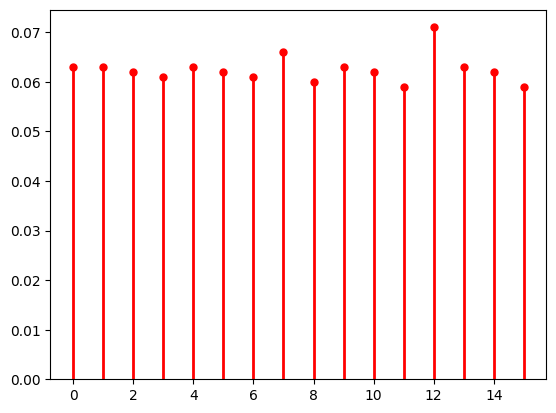

In [324]:
plt.plot(codes_uniq, codes_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(codes_uniq, 0, codes_epmf, colors='r', lw=2)
plt.ylim(0)

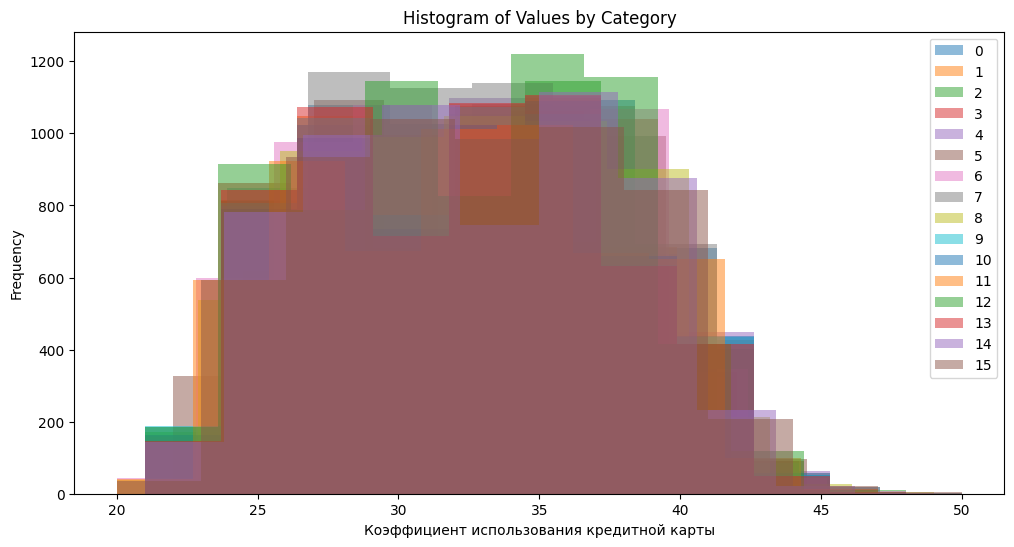

In [337]:
plt.figure(figsize=(12, 6))
tmp.groupby('Occupation_code')['Credit_Utilization_Ratio'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Histogram of Values by Category')
plt.xlabel('Коэффициент использования кредитной карты')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

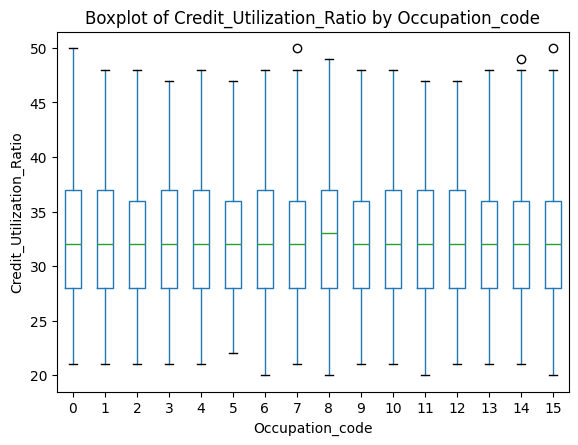

In [339]:
plt.figure(figsize=(12, 6))
tmp.boxplot(column='Credit_Utilization_Ratio', by='Occupation_code', grid=False)
plt.title('Boxplot of Credit_Utilization_Ratio by Occupation_code')
plt.suptitle('')  # Убираем стандартный заголовок, который добавляется методом boxplot
plt.xlabel('Occupation_code')
plt.ylabel('Credit_Utilization_Ratio')
plt.show()

12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости. 
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона.
Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.